This notebook compares varFDTD examples with 3D FDTD.

In [2]:
from config import Config
import os, sys
sys.path.append(Config.LUMERICAL_API_PATH) # if this fails adjust the config.py and add the lumerical api path
root_path = Config.ROOT_DIR

import numpy as np
import scipy as sp

import lumapi
from lumopt.utilities.wavelengths import Wavelengths
import lumopt.utilities.wavelengths as w1
from lumopt.utilities.materials import Material
from lumopt.figures_of_merit.modematch import ModeMatch
from lumopt.optimization import Optimization
from lumopt_gl.geometries.geometry_gl import Geometry_GL
from lumopt_gl.optimizers.optimizer_gl import OptimizerGL
from lumopt_gl.optimization import OptimizationGL
from lumopt.optimizers.generic_optimizers import ScipyOptimizers

In [3]:
def optimizer2D(polygon, base_script, max_iter = 5):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1)

    optimizer = ScipyOptimizers(max_iter = max_iter,method = 'L-BFGS-B',scaling_factor = 1.0e6,pgtol = 1.0e-5,ftol = 1.0e-5,scale_initial_gradient_to = 0.0)

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=True, store_all_simulations = False)
    return opt

def optimizer2(polygon, base_script, max_iter = 5):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom', mode_number = 2, direction = 'Forward', multi_freq_src = True, target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1)

    optimizer = ScipyOptimizers(max_iter = max_iter,method = 'L-BFGS-B',scaling_factor = 1.0e6,pgtol = 1.0e-5,ftol = 1.0e-5,scale_initial_gradient_to = 0.0)\
        
    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=False, store_all_simulations = False)
    return opt

def optimizer3D(polygon, base_script, max_iter = 5):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental TE mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1) # for 3D, we need to specify TE/TM

    
    optimizer = ScipyOptimizers(max_iter = max_iter,method = 'L-BFGS-B',scaling_factor = 1.0e6,pgtol = 1.0e-5,ftol = 1.0e-5,scale_initial_gradient_to = 0.0)

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=False, store_all_simulations = False, GPU = True) # and set varFDTD to False. Set GPU to True if you have one.
    return opt

In [4]:
from geometries.ybranch import *

taper, base_script = ybranch_2D(num_params = 3)
opt25D = optimizer2D(taper, base_script)

taper, base_script = ybranch_2D_FDTD(num_params = 3)
opt2D = optimizer2(taper, base_script)

taper, base_script = ybranch_3D(num_params = 3)
opt3D = optimizer3D(taper, base_script)

Accurate interface detection enabled
Accurate interface detection enabled
Accurate interface detection enabled


In [7]:
taper, base_script = ybranch_3D(num_params = 4)
opt25D = optimizer3D(taper, base_script)

Accurate interface detection enabled


In [9]:
opt25D.run()

Wavelength range of source object will be superseded by the global settings.
Running scipy optimizer
bounds = [[0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]]
start = [0.32 0.39 0.46 0.53]


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Making forward solve
Making adjoint solve
[3.2e-07 3.9e-07 4.6e-07 5.3e-07]
Running solves
Processing forward solve
FOM = 0.7112531806470962
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
....


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[8.e-07 2.e-07 8.e-07 8.e-07]
Running solves


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running scipy optimizer
bounds = [[0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]]
start = [0.28888889 0.32777778 0.36666667 0.40555556 0.44444444 0.48333333
 0.52222222 0.56111111]
Making forward solve
Making adjoint solve
[2.88888889e-07 3.27777778e-07 3.66666667e-07 4.05555556e-07
 4.44444444e-07 4.83333333e-07 5.22222222e-07 5.61111111e-07]
Running solves
Processing forward solve
FOM = 0.7250107995341999
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 1e-10
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[5.76870354e-07 2.56553068e-07 2.00000000e-07 2.00000000e-07
 8.00000000e-07 8.00000000e-07 8.00000000e-07 7.91459012e-07]
Running solves
Processing forward solve
FOM = 0.43689926940838064
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 1e-10
........
Making forward solve
Making adjoint solve
[3.48566101e-07 3.13018175e-07 3.32129020e-07 3.62959125e-07
 5.18124757e-07 5.48954862e-07 5.79784967e-07 6.08845158e-07]
Running solves
Processing forward solve
FOM = 0.8886500371801787
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 1e-10
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[4.03055368e-07 2.60129684e-07 2.87279516e-07 3.57866553e-07
 5.92529353e-07 5.87426429e-07 6.12051192e-07 6.16376126e-07]
Running solves
Processing forward solve
FOM = 0.9041744446722592
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 1e-10
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.57840810e-07 2.54831985e-07 2.79521719e-07 3.61621328e-07
 5.80662031e-07 5.78961041e-07 6.02251793e-07 5.80744857e-07]
Running solves
Processing forward solve
FOM = 0.9317391156623291
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 1e-10
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.36740815e-07 2.45375759e-07 2.64195961e-07 3.65911816e-07
 5.93012858e-07 5.86838770e-07 6.06859296e-07 5.52968566e-07]
Running solves
Processing forward solve
FOM = 0.9368761144306166
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 1e-10
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.36170871e-07 2.50401317e-07 2.65153640e-07 3.69583352e-07
 6.03456058e-07 5.95363067e-07 6.13695626e-07 5.48005866e-07]
Running solves
Processing forward solve
FOM = 0.9387442670371652
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 1e-10
........


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Number of FOM evaluations: 5
FINAL FOM = 0.9387442670371652
FINAL PARAMETERS = [3.36170871e-07 2.50401317e-07 2.65153640e-07 3.69583352e-07
 6.03456058e-07 5.95363067e-07 6.13695626e-07 5.48005866e-07]
Wavelength range of source object will be superseded by the global settings.


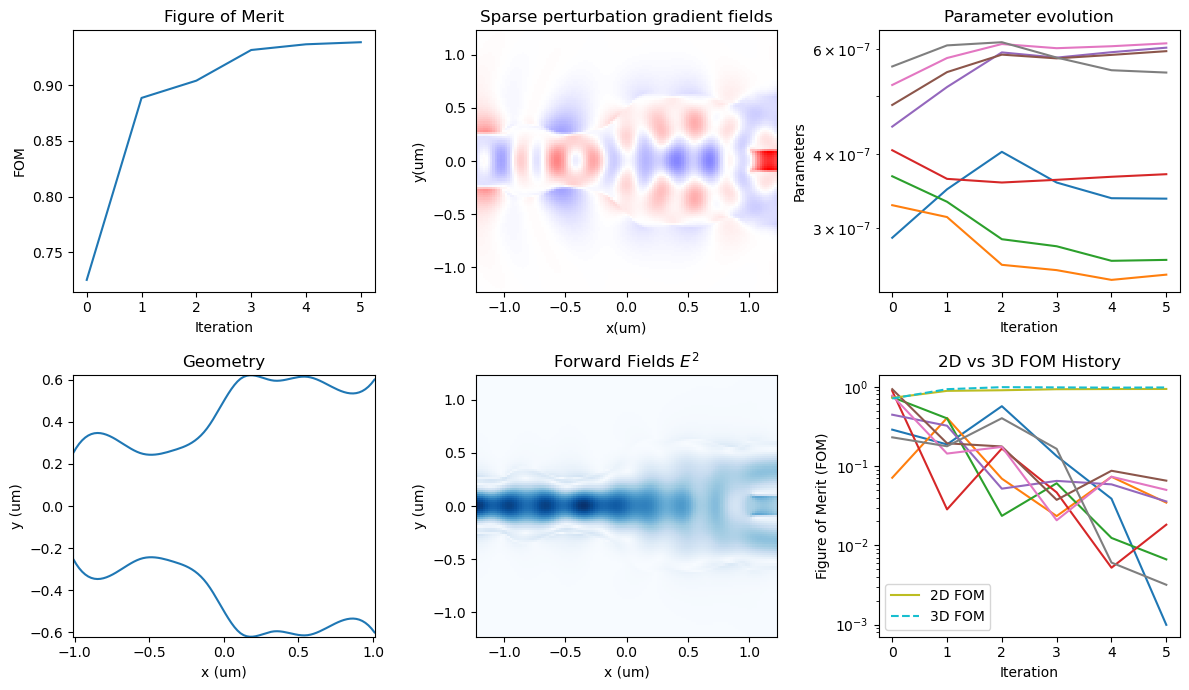

In [14]:
from scripts.varFDTDtester import varFDTD_visualizer

x = varFDTD_visualizer(opt2D, opt3D)

In [15]:
x

[array([0.7250108 , 0.88865004, 0.90417444, 0.93173912, 0.93687611,
        0.93874427]),
 [0.711193774815976,
  0.9327292596947192,
  0.9889829333869641,
  0.9827712485077229,
  0.975257437866548,
  0.9809212665355359]]

In [14]:
print(x[0][4],x[1][4])

0.9362303948156677 0.9795526173113892


In [16]:
import numpy as np

# Sample data for x[0] and x[1]
x_0 = x[0]
x_1 = x[1]

# Calculate percentage difference
percentage_diff = np.abs(x_0 - x_1) / ((x_0 + x_1) / 2) * 100

print(percentage_diff)


[0.24290957 6.86611564 5.67104885 3.41684363 4.52266486 5.34320067
 4.91265946 2.93815163 2.88322619 0.52854934 0.18553836 0.08342032
 0.40907672 0.64587467 0.77567292 0.79754476 0.98244934 0.67970613
 0.67984598]


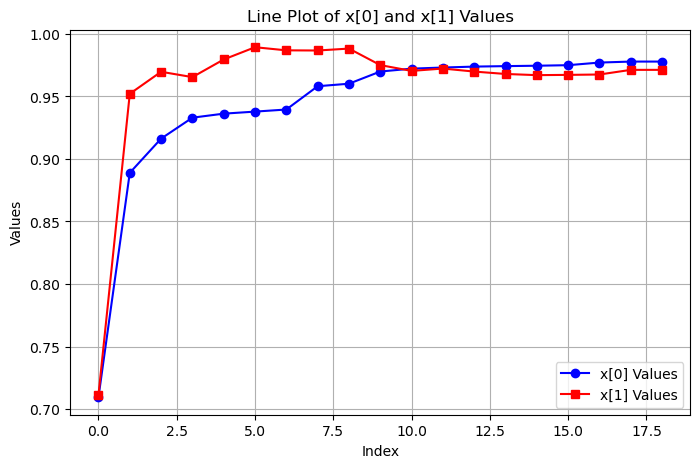

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Create x indices for the array elements
x_indices = np.arange(len(x_0))

# Create a line plot
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(x_indices, x_0, marker='o', linestyle='-', color='blue', label='x[0] Values')
plt.plot(x_indices, x_1, marker='s', linestyle='-', color='red', label='x[1] Values')

# Adding titles and labels
plt.title('Line Plot of x[0] and x[1] Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Adds a grid
plt.show()


In [1]:
from geometries.SWG_to_strip import *

swg, base_script = SWG_to_strip(dimension = 2)
swg2d = optimizer2D(swg, base_script)

swg, base_script = ybranch_3D(dimension = 3)
swg3d = optimizer3D(swg, base_script)

ModuleNotFoundError: No module named 'lumapi'

In [4]:
from scripts.varFDTDtester import varFDTD_visualizer

x = varFDTD_visualizer(opt2D, opt3D)

NameError: name 'opt2D' is not defined

In [ ]:
p = [2.98002467e-07, 2.52193622e-07, 4.86925321e-07, 6.34380456e-07, 5.69194962e-07]


In [ ]:
opt3D.initialize()
opt3D.run_forward_simulation(p)

Wavelength range of source object will be superseded by the global settings.


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running scipy optimizer
bounds = [[0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.05 0.4 ]
 [0.07 0.4 ]
 [0.07 0.4 ]
 [0.07 0.4 ]
 [0.07 0.4 ]]
start = [0.20874127 0.21199382 0.25523579 0.22969245 0.23934837 0.21084288
 0.18841335 0.17436026 0.15954425 0.16987731 0.15966824 0.16661063
 0.15891695 0.1660805  0.15959542 0.16766625 0.1603612  0.16927228
 0.16451584 0.17289811 0.16985183 0.17354513 0.17534016 0.17351338
 0.18101446 0.17139001 0.18240533 0.16731146 0.17932853 0.16364544
 0.10112885 0.11678231 0.12779641 0.16072114]
Making forward solve
Making adjoint solve
[2.08741265e-07 2.11993820e-07 2.55235792e-07 2.29692453e-07
 2.39348368e-07 2.10842880e-07 1

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))
C:\Program Files/Lumer

Saved frame
Making forward solve
Making adjoint solve
[2.09206170e-07 2.12677618e-07 2.54923850e-07 2.29998384e-07
 2.38846777e-07 2.10285508e-07 1.87163189e-07 1.74367073e-07
 1.58918467e-07 1.71089055e-07 1.60186195e-07 1.67753252e-07
 1.59975769e-07 1.67338319e-07 1.61116427e-07 1.69321112e-07
 1.62794098e-07 1.71485600e-07 1.67015512e-07 1.75043976e-07
 1.71947082e-07 1.74706493e-07 1.76081736e-07 1.72658720e-07
 1.80193639e-07 1.68732876e-07 1.80403469e-07 1.65295457e-07
 1.77128035e-07 1.62833278e-07 1.03485991e-07 1.23315444e-07
 1.38694282e-07 1.55869363e-07]
Running solves
Processing forward solve
FOM = 0.9976801774947253
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-08
..................................

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))
C:\Program Files/Lumer

Saved frame
Making forward solve
Making adjoint solve
[2.09559941e-07 2.13124377e-07 2.55026801e-07 2.30352909e-07
 2.38935139e-07 2.10408008e-07 1.86994618e-07 1.74640069e-07
 1.58762445e-07 1.71552341e-07 1.60170808e-07 1.68121007e-07
 1.59931441e-07 1.67559381e-07 1.60941401e-07 1.69445613e-07
 1.62564028e-07 1.71500232e-07 1.66675852e-07 1.74857296e-07
 1.71545963e-07 1.74495981e-07 1.75897421e-07 1.72569670e-07
 1.80194785e-07 1.68765553e-07 1.80567810e-07 1.65502994e-07
 1.77252020e-07 1.62723161e-07 1.04375940e-07 1.23205149e-07
 1.37278458e-07 1.55291606e-07]
Running solves
Processing forward solve
FOM = 0.9977554539311381
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-08
..................................

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))
C:\Program Files/Lumer

Saved frame
Making forward solve
Making adjoint solve
[2.10551259e-07 2.14103025e-07 2.55389318e-07 2.31003837e-07
 2.39311067e-07 2.10420655e-07 1.86708826e-07 1.74892103e-07
 1.58501341e-07 1.72255796e-07 1.60262422e-07 1.68573777e-07
 1.59991324e-07 1.67759492e-07 1.60828735e-07 1.69608489e-07
 1.62517960e-07 1.71699517e-07 1.66502851e-07 1.74714205e-07
 1.71183066e-07 1.74246698e-07 1.75826410e-07 1.72318759e-07
 1.80318698e-07 1.68543756e-07 1.80798889e-07 1.65597264e-07
 1.77276538e-07 1.62312313e-07 1.05717424e-07 1.23218980e-07
 1.36414614e-07 1.53949581e-07]
Running solves
Processing forward solve
FOM = 0.9978302420012763
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-08
..................................

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))
C:\Program Files/Lumer

Saved frame
Making forward solve
Making adjoint solve
[2.12497364e-07 2.15762156e-07 2.56286357e-07 2.32067988e-07
 2.40310777e-07 2.10236502e-07 1.86396176e-07 1.74836812e-07
 1.58017439e-07 1.72892536e-07 1.60370861e-07 1.68761374e-07
 1.60104875e-07 1.67650737e-07 1.60795179e-07 1.69658614e-07
 1.62679767e-07 1.71936531e-07 1.66460410e-07 1.74504889e-07
 1.70836223e-07 1.73901525e-07 1.75916498e-07 1.72024849e-07
 1.80891173e-07 1.68314019e-07 1.81357430e-07 1.65760323e-07
 1.77313345e-07 1.61543652e-07 1.06346175e-07 1.23027643e-07
 1.35753108e-07 1.52676912e-07]
Running solves
Processing forward solve
FOM = 0.9979624673367242
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-08
..................................

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))
C:\Program Files/Lumer

Saved frame
Number of FOM evaluations: 5
FINAL FOM = 0.9979624673367242
FINAL PARAMETERS = [2.12497364e-07 2.15762156e-07 2.56286357e-07 2.32067988e-07
 2.40310777e-07 2.10236502e-07 1.86396176e-07 1.74836812e-07
 1.58017439e-07 1.72892536e-07 1.60370861e-07 1.68761374e-07
 1.60104875e-07 1.67650737e-07 1.60795179e-07 1.69658614e-07
 1.62679767e-07 1.71936531e-07 1.66460410e-07 1.74504889e-07
 1.70836223e-07 1.73901525e-07 1.75916498e-07 1.72024849e-07
 1.80891173e-07 1.68314019e-07 1.81357430e-07 1.65760323e-07
 1.77313345e-07 1.61543652e-07 1.06346175e-07 1.23027643e-07
 1.35753108e-07 1.52676912e-07]
Wavelength range of source object will be superseded by the global settings.


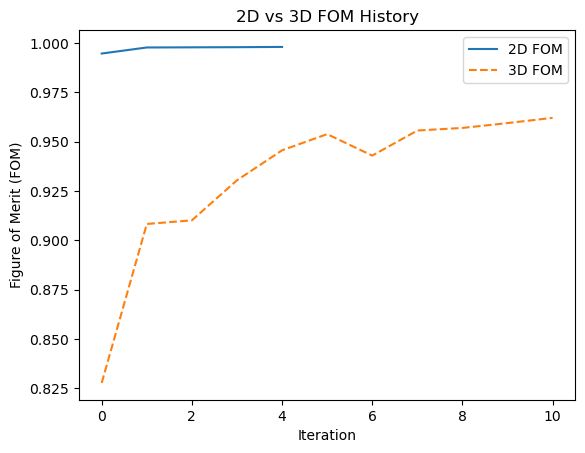

In [10]:
from scripts.varFDTDtester import varFDTD_visualizer

x = varFDTD_visualizer(opt2D,opt3D)

In [11]:
x

[array([0.99461282, 0.99768018, 0.99775545, 0.99783024, 0.99796247]),
 [0.8276805384716716,
  0.9082277853953639,
  0.9100842524125871,
  0.9303654051931987,
  0.9455716825144488,
  0.9537646557432989,
  0.9428811866363216,
  0.9555896229888518,
  0.9569110932579828,
  0.9593597484633608,
  0.9620247136281906]]

In [12]:
import numpy as np

# Sample data for x[0] and x[1]
x_0 = x[0]
x_1 = x[1]

# Calculate percentage difference
percentage_diff = np.abs(x_0 - x_1) / ((x_0 + x_1) / 2) * 100

print(percentage_diff)


ValueError: operands could not be broadcast together with shapes (5,) (11,) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create x indices for the array elements
x_indices = np.arange(len(x_0))

# Create a line plot
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(x_0, marker='o', linestyle='-', color='blue', label='x[0] Values')
plt.plot(x_1, marker='s', linestyle='-', color='red', label='x[1] Values')

# Adding titles and labels
plt.title('Line Plot of x[0] and x[1] Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Adds a grid
plt.show()


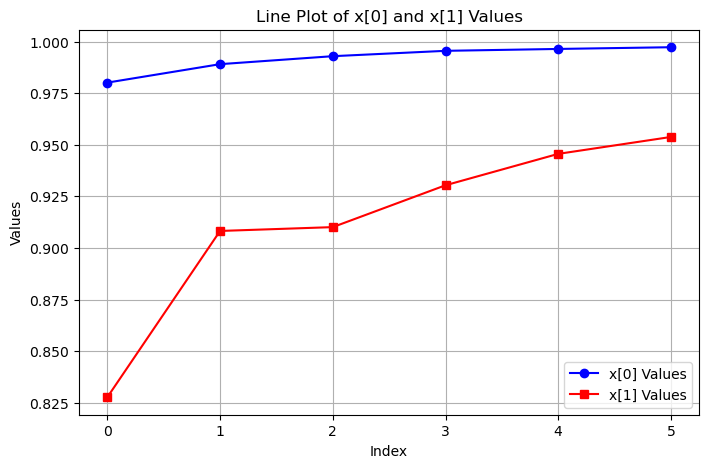

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create x indices for the array elements
x_indices = np.arange(len(x_0))

# Create a line plot
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(x_0, marker='o', linestyle='-', color='blue', label='x[0] Values')
plt.plot(x_1, marker='s', linestyle='-', color='red', label='x[1] Values')

# Adding titles and labels
plt.title('Line Plot of x[0] and x[1] Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Adds a grid
plt.show()


In [5]:
from geometries.SWG_to_strip import SWG_to_strip

SWG_finger, base_script = SWG_to_strip(dimension = 3, num_gratings = 30, static_gratings = 3, mesh = 2)
opt3D = optimizer3D(SWG_finger, base_script)

SWG_finger, base_script = SWG_to_strip(dimension = 2, num_gratings = 30, static_gratings = 3, mesh = 2)
opt2D = optimizer2D(SWG_finger, base_script)

Accurate interface detection enabled
Accurate interface detection enabled
